##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------

***Team number:36***

---

***Full names of all students in the team:***

(Rishabh Patil, Kaustubh Mahatme, Harshit Agarwal, Shivam Verma,
 Vaishnavi Shreshthi)

---

***Id number of all students in the team:***

(2021A7PS0464H, 2021A7PS0312H, 2021A7PS0247H, 2021A3PS0779H, 2020AAPS2203H)


This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('communities.data', header=None)

# Provided column names
column_names_text = """
state
county
community
communityname
fold
population
householdsize
racepctblack
racePctWhite
racePctAsian
racePctHisp
agePct12t21
agePct12t29
agePct16t24
agePct65up
numbUrban
pctUrban
medIncome
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
medFamInc
perCapInc
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
NumUnderPov
PctPopUnderPov
PctLess9thGrade
PctNotHSGrad
PctBSorMore
PctUnemployed
PctEmploy
PctEmplManu
PctEmplProfServ
PctOccupManu
PctOccupMgmtProf
MalePctDivorce
MalePctNevMarr
FemalePctDiv
TotalPctDiv
PersPerFam
PctFam2Par
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMomYoungKids
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRecent
PctImmigRec5
PctImmigRec8
PctImmigRec10
PctRecentImmig
PctRecImmig5
PctRecImmig8
PctRecImmig10
PctSpeakEnglOnly
PctNotSpeakEnglWell
PctLargHouseFam
PctLargHouseOccup
PersPerOccupHous
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
HousVacant
PctHousOccup
PctHousOwnOcc
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
PctWOFullPlumb
OwnOccLowQuart
OwnOccMedVal
OwnOccHiQuart
RentLowQ
RentMedian
RentHighQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctBornSameState
PctSameHouse85
PctSameCity85
PctSameState85
LemasSwornFT
LemasSwFTPerPop
LemasSwFTFieldOps
LemasSwFTFieldPerPop
LemasTotalReq
LemasTotReqPerPop
PolicReqPerOffic
PolicPerPop
RacialMatchCommPol
PctPolicWhite
PctPolicBlack
PctPolicHisp
PctPolicAsian
PctPolicMinor
OfficAssgnDrugUnits
NumKindsDrugsSeiz
PolicAveOTWorked
LandArea
PopDens
PctUsePubTrans
PolicCars
PolicOperBudg
LemasPctPolicOnPatr
LemasGangUnitDeploy
LemasPctOfficDrugUn
PolicBudgPerPop
ViolentCrimesPerPop
"""

# Extract column names from the text
column_names = column_names_text.strip().split('\n')

# Printing the list of column names
print("List of Column Names:")
print(column_names)
# Assigning the column names to the DataFrame
df.columns = column_names

List of Column Names:
['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImm

In [3]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
# Specifying the names of the features you want to label encode
features_to_label_encode = ['communityname']

label_encoder = LabelEncoder()
for feature in features_to_label_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

In [4]:
# Save the DataFrame to a new .csv file
csv_file_path = 'output_file.csv'
df.to_csv(csv_file_path, index=False)

In [5]:
df = pd.read_csv('output_file.csv', header=None,names=column_names)
# Drop the first row (axis=0)
df = df.drop(0, axis=0)
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1,8,?,?,804,1,0.19,0.33,0.02,0.9,0.12,...,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
2,53,?,?,1625,1,0.0,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
3,24,?,?,1,1,0.0,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
4,34,5,81440,1787,1,0.04,0.77,1.0,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
5,42,95,6096,141,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,12,?,?,1597,10,0.01,0.4,0.1,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.0,?,0.09
1991,6,?,?,1455,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.2,?,?,?,?,0.0,?,0.45
1992,9,9,80070,1707,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1993,25,17,72600,1695,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19



## **_1.1 Handling Null Values_**

In [6]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Count the number of null values in each feature
null_counts = df.isnull().sum()
print("Number of null values in each feature:")
print(null_counts)

Number of null values in each feature:
state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64


In [7]:
df.isnull().sum()*100/df.shape[0]  #in percentage

state                   0.000000
county                 58.876630
community              59.027081
communityname           0.000000
fold                    0.000000
                         ...    
LemasPctPolicOnPatr    84.002006
LemasGangUnitDeploy    84.002006
LemasPctOfficDrugUn     0.000000
PolicBudgPerPop        84.002006
ViolentCrimesPerPop     0.000000
Length: 128, dtype: float64

In [8]:
arr = []
for i in range(1, len(null_counts)):
    if null_counts[i] / df.shape[0] > 0.6:  #dropping all the columns which have more than 60% NaN values
        arr.append(df.columns[i])
print(arr)
my_arr = np.array(arr)
print(my_arr.shape)

['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
(22,)


In [9]:
df.drop(my_arr, axis=1, inplace=True)
print(df.columns)
print(df.shape) #new dimensions

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
       'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'LemasPctOfficDrugUn', 'ViolentCrimesPerPop'],
      dtype='object', length=106)
(1994, 106)


In [10]:
# Replace NaN values with the mean of each respective column
df= df.apply(pd.to_numeric,errors = 'coerce')
df = df.fillna(df.mean())

# Display the DataFrame with NaN values replaced by means
print("DataFrame with NaN values replaced by means:")
df

DataFrame with NaN values replaced by means:


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
1,8,58.826829,46188.336597,804,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
2,53,58.826829,46188.336597,1625,1,0.00,0.16,0.12,0.74,0.45,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
3,24,58.826829,46188.336597,1,1,0.00,0.42,0.49,0.56,0.17,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
4,34,5.000000,81440.000000,1787,1,0.04,0.77,1.00,0.08,0.12,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
5,42,95.000000,6096.000000,141,1,0.01,0.55,0.02,0.95,0.09,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,12,58.826829,46188.336597,1597,10,0.01,0.40,0.10,0.87,0.12,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1991,6,58.826829,46188.336597,1455,10,0.05,0.96,0.46,0.28,0.83,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1992,9,9.000000,80070.000000,1707,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1993,25,17.000000,72600.000000,1695,10,0.08,0.51,0.06,0.87,0.22,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19



## **_1.2 Principle Component Analysis(PCA) : Dimensionality Reduction_**

In [11]:
X = df.drop('ViolentCrimesPerPop', axis=1).copy()
mean_ = X.mean(axis =0)
std_ = X.std(axis=0)

X = (X-mean_)/std_

# mean centering
x_mean = np.mean(X, axis=0)
print(x_mean)
X = X - x_mean

state                 -9.175765e-17
county                -7.126808e-18
community              9.799361e-18
communityname         -7.750403e-17
fold                  -2.280578e-16
                           ...     
PctSameState85         2.440932e-16
LandArea               3.385234e-17
PopDens                6.948638e-17
PctUsePubTrans         7.304978e-17
LemasPctOfficDrugUn   -4.632425e-17
Length: 105, dtype: float64


In [12]:
covariance=np.cov(np.transpose(X), bias=True)
print(covariance)
print(covariance.shape)

[[ 9.99498495e-01  1.63530740e-01  1.92831492e-04 ... -1.37870355e-01
  -2.14206747e-02 -7.52668766e-02]
 [ 1.63530740e-01  9.99498495e-01  1.19284186e-01 ... -4.46644643e-02
  -9.33308570e-02  7.77520963e-02]
 [ 1.92831492e-04  1.19284186e-01  9.99498495e-01 ... -5.14717420e-02
  -3.19388318e-02  8.69833440e-04]
 ...
 [-1.37870355e-01 -4.46644643e-02 -5.14717420e-02 ...  9.99498495e-01
   5.87509485e-01  2.27969600e-01]
 [-2.14206747e-02 -9.33308570e-02 -3.19388318e-02 ...  5.87509485e-01
   9.99498495e-01  2.06540296e-01]
 [-7.52668766e-02  7.77520963e-02  8.69833440e-04 ...  2.27969600e-01
   2.06540296e-01  9.99498495e-01]]
(105, 105)


In [13]:
# eigenvectors, eigenvalues
eigen_values , eigen_vectors = np.linalg.eigh(covariance)
print('E-value:', eigen_values)
print('E-vector')
print(eigen_vectors)

E-value: [6.27660935e-04 8.06578425e-04 1.10114543e-03 1.29323806e-03
 1.76320779e-03 2.03108095e-03 2.71783384e-03 3.77921930e-03
 4.08728918e-03 5.12684513e-03 5.73396690e-03 5.96191651e-03
 8.30979900e-03 9.27076219e-03 1.14068291e-02 1.25534274e-02
 1.37903806e-02 1.54708097e-02 1.71675476e-02 1.83236154e-02
 2.00043198e-02 2.09290045e-02 2.23671108e-02 2.37774351e-02
 2.54899939e-02 2.79723066e-02 3.05235103e-02 3.17308003e-02
 3.36816445e-02 3.50905698e-02 3.75516819e-02 4.00506911e-02
 4.15461086e-02 4.34776018e-02 4.57077857e-02 4.87438648e-02
 5.06665228e-02 5.78303133e-02 6.14648041e-02 6.36025977e-02
 6.54788666e-02 6.86094454e-02 7.25056996e-02 7.66680831e-02
 8.09977779e-02 8.95612302e-02 9.90477306e-02 1.02495078e-01
 1.06566347e-01 1.11270575e-01 1.25792767e-01 1.36916950e-01
 1.40040356e-01 1.60143893e-01 1.64398117e-01 1.81743658e-01
 1.88944881e-01 1.98617210e-01 2.04913886e-01 2.10221743e-01
 2.20107122e-01 2.38013621e-01 2.43760436e-01 2.53490733e-01
 2.57899730e-01

In [14]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]

print(sorted_eigenvalue)
print(sorted_eigenvectors)

[2.51959007e+01 1.69476960e+01 9.30594801e+00 7.57616562e+00
 5.66986876e+00 4.24469239e+00 3.24156911e+00 2.98235995e+00
 2.10078693e+00 1.68687537e+00 1.60043684e+00 1.57352591e+00
 1.47515606e+00 1.40621621e+00 1.13629431e+00 9.97117273e-01
 9.58424013e-01 9.20036664e-01 8.68022137e-01 8.57277437e-01
 7.41884013e-01 6.94776288e-01 6.41130112e-01 6.25801220e-01
 6.01946885e-01 5.46782558e-01 5.33252614e-01 5.11464012e-01
 4.85143429e-01 4.71371842e-01 4.55972528e-01 4.26419996e-01
 3.99465364e-01 3.91086402e-01 3.62497590e-01 3.55667382e-01
 3.46065476e-01 3.24266247e-01 3.02989906e-01 2.83250767e-01
 2.57899730e-01 2.53490733e-01 2.43760436e-01 2.38013621e-01
 2.20107122e-01 2.10221743e-01 2.04913886e-01 1.98617210e-01
 1.88944881e-01 1.81743658e-01 1.64398117e-01 1.60143893e-01
 1.40040356e-01 1.36916950e-01 1.25792767e-01 1.11270575e-01
 1.06566347e-01 1.02495078e-01 9.90477306e-02 8.95612302e-02
 8.09977779e-02 7.66680831e-02 7.25056996e-02 6.86094454e-02
 6.54788666e-02 6.360259

In [15]:
total_variance = np.sum(sorted_eigenvalue)
explained_variance = sorted_eigenvalue / total_variance
cumulative_explained_variance = np.cumsum(explained_variance)

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)


Cumulative Explained Variance:
[0.24008136 0.40156898 0.49024152 0.56243168 0.61645753 0.65690345
 0.68779103 0.71620871 0.73622624 0.75229978 0.76754969 0.78254317
 0.79659932 0.80999858 0.82082586 0.83032698 0.83945941 0.84822606
 0.85649708 0.86466573 0.87173483 0.87835507 0.88446413 0.89042714
 0.89616284 0.90137291 0.90645405 0.91132758 0.91595031 0.92044182
 0.9247866  0.92884978 0.93265612 0.93638262 0.93983671 0.94322572
 0.94652323 0.94961303 0.9525001  0.95519908 0.9576565  0.96007191
 0.9623946  0.96466253 0.96675984 0.96876296 0.9707155  0.97260804
 0.97440842 0.97614018 0.97770666 0.97923261 0.98056699 0.98187162
 0.98307025 0.9841305  0.98514592 0.98612256 0.98706634 0.98791974
 0.98869153 0.98942207 0.99011295 0.9907667  0.99139062 0.99199666
 0.99258233 0.99313337 0.99361615 0.99408062 0.99451615 0.99493043
 0.9953263  0.99570793 0.99606574 0.99640011 0.99672104 0.99702339
 0.99731424 0.99758078 0.99782366 0.99805023 0.99826335 0.99846278
 0.99865339 0.99882799 0.99899

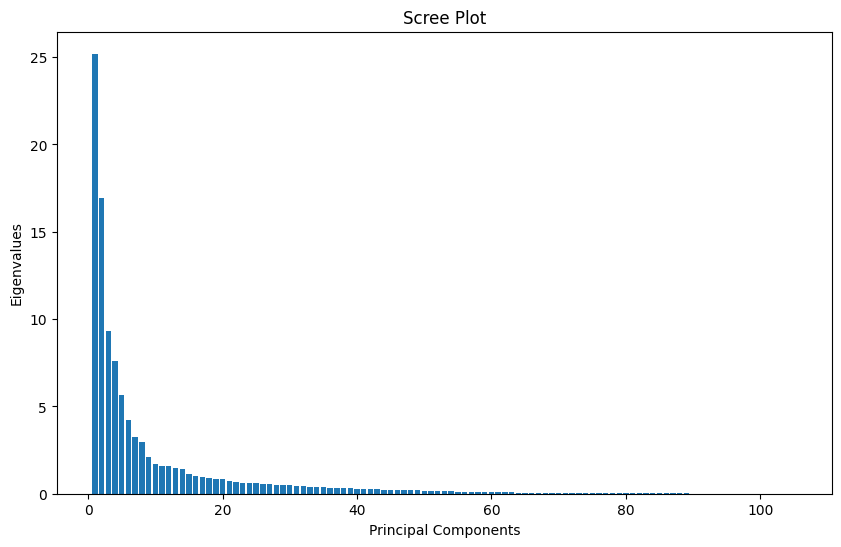

In [16]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_eigenvalue) + 1), sorted_eigenvalue)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
num_components = len(sorted_eigenvalue)

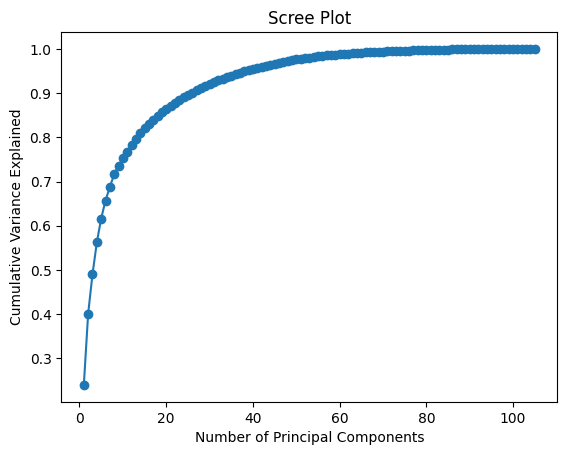

In [17]:
plt.plot(range(1, len(sorted_eigenvalue) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot')
plt.show()

In [18]:
# Assuming 'threshold' is the chosen cumulative variance threshold
threshold = 0.80
n_components = np.argmax(cumulative_explained_variance >= threshold)
print("num_components = ",n_components)

#Transform the data
top_eigenvectors = sorted_eigenvectors[:, :n_components]
X_transformed = X.dot(top_eigenvectors)

print(X_transformed)

num_components =  13
            0          1         2         3         4         5         6   \
1    -1.338961  -0.909909 -3.319376 -0.855491  1.315574  3.215432  0.195678   
2     1.426846   0.395972 -4.250236 -2.048021 -2.481673  4.271630  2.221525   
3     2.166351  -2.380772  0.191304  0.341580 -0.306377  2.439889  1.907954   
4    -3.063707   1.910803  3.574910  0.437686  3.173740  0.244405  4.025105   
5    -5.533206  -2.794822  2.737238  0.380029  1.772453  0.549704 -0.492640   
...        ...        ...       ...       ...       ...       ...       ...   
1990 -3.339693   0.166878 -2.590716 -3.123259 -0.650196  1.599293 -0.082352   
1991  2.093163   9.245282  1.146815 -5.230808 -1.414577  0.778818 -0.154069   
1992  3.188504   0.305437 -0.987234  3.608693  0.377146 -0.228114  0.524572   
1993 -1.777006   3.421957 -1.516300 -1.289976 -1.459789 -2.276077  0.747715   
1994  3.241022  10.257435  3.782762 -0.428087  1.511260  2.572554 -0.768641   

            7         8       

In [19]:
def create_output_class(df, num_intervals):
    bins = np.linspace(0, 1, num_intervals + 1)
    class_labels = list(range(1, num_intervals + 1))

    # Creating a new column 'output_class' with the respective class numbers
    df['output_class'] = pd.cut(df['ViolentCrimesPerPop'], bins=bins, labels=class_labels, include_lowest=True)

    # Displaying the DataFrame with the new 'output_class' column
    print(f"DataFrame with {num_intervals} output classes:")
    print(df[['ViolentCrimesPerPop', 'output_class']])
    df.drop('ViolentCrimesPerPop', axis=1, inplace=True)

# Creating a copy of the DataFrame for each case
df_copy_15_intervals = df.copy()
create_output_class(df_copy_15_intervals, 15)

df_copy_7_intervals = df.copy()
create_output_class(df_copy_7_intervals, 7)

df_copy_4_intervals = df.copy()
create_output_class(df_copy_4_intervals, 4)


DataFrame with 15 output classes:
      ViolentCrimesPerPop output_class
1                    0.20            3
2                    0.67           11
3                    0.43            7
4                    0.12            2
5                    0.03            1
...                   ...          ...
1990                 0.09            2
1991                 0.45            7
1992                 0.23            4
1993                 0.19            3
1994                 0.48            8

[1994 rows x 2 columns]
DataFrame with 7 output classes:
      ViolentCrimesPerPop output_class
1                    0.20            2
2                    0.67            5
3                    0.43            4
4                    0.12            1
5                    0.03            1
...                   ...          ...
1990                 0.09            1
1991                 0.45            4
1992                 0.23            2
1993                 0.19            2
1994       

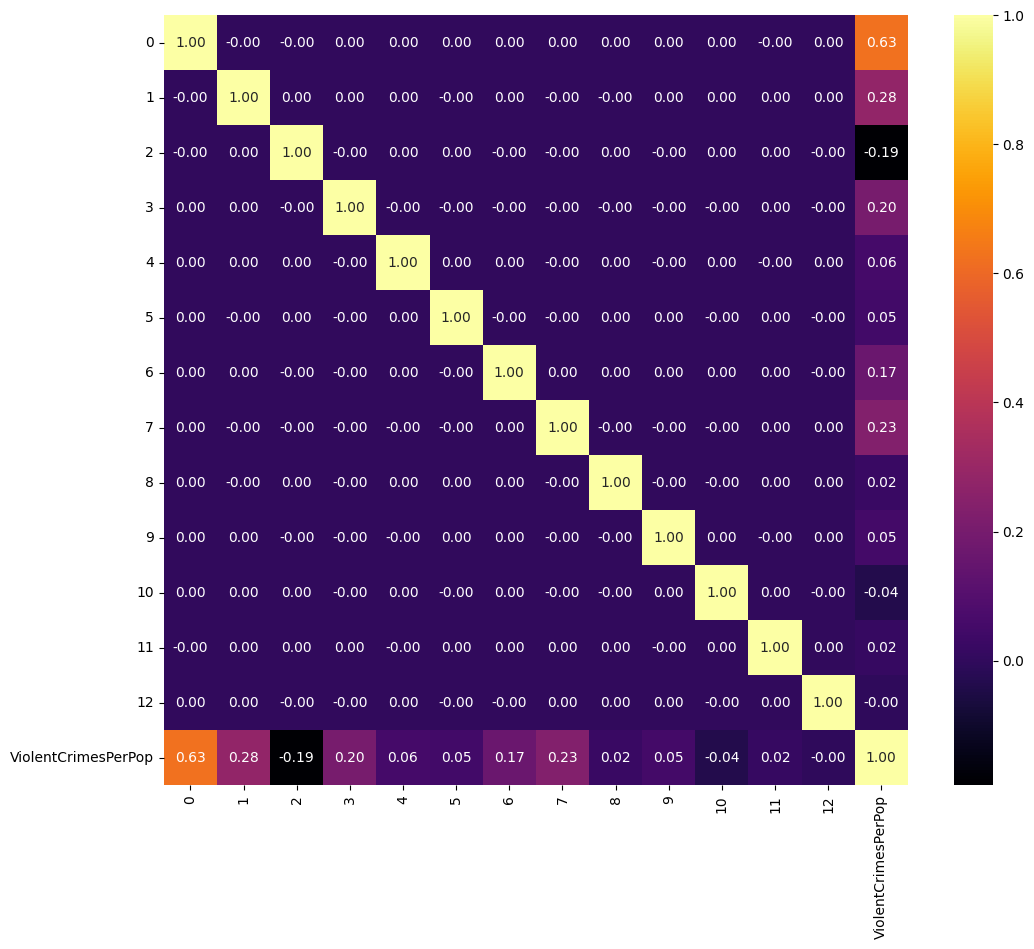

In [20]:
df_new = pd.concat([X_transformed, df['ViolentCrimesPerPop']], axis=1)
correlation_matrix = df_new.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.show()

In [21]:
X = X_transformed
Y_15 = df_copy_15_intervals.iloc[:, -1]
Y_7 = df_copy_7_intervals.iloc[:, -1]
Y_4 = df_copy_4_intervals.iloc[:, -1]


Y = df_copy_4_intervals.iloc[:, -1]   # The last column
df1=pd.concat([X, Y], axis=1)
df1.to_csv('Assignment2_ppfile.csv')

# Converting to NumPy arrays
X_array = X.values
Y_array_15 = Y_15.values
Y_array_7 = Y_7.values
Y_array_4 = Y_4.values

# Defining the split ratio (e.g., 80% train, 20% test)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

# Spliting into train and test sets
X_train, X_test = X_array[:split_index, :], X_array[split_index:, :]
Y_train_15, Y_test_15 = Y_array_15[:split_index], Y_array_15[split_index:]
Y_train_7, Y_test_7 = Y_array_7[:split_index], Y_array_7[split_index:]
Y_train_4, Y_test_4 = Y_array_4[:split_index], Y_array_4[split_index:]

# Displaying the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train_15.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test_15.shape)

X_train shape: (1595, 13)
Y_train shape: (1595,)
X_test shape: (399, 13)
Y_test shape: (399,)


# ***2. Decision tree model with entropy implementation***



## **_2.1 Implementation of the Model_**

Decision Tress gives the importance of different features in the decision-making process. Features that appear higher in the tree and closer to the root are more influential in determining the output.

Decision trees should be validated or cross-validated to assess their performance on new data and avoid overfitting.

$$
\operatorname{Entropy}(Y)=-\sum_{i=1}^C p_i \cdot \log _2\left(p_i\right)
$$
where $C$ is the number of unique classes, and $p_i$ is the probability of class $i$ in the set $Y$.


## **_2.2 Code_**

In [22]:
# Node class to build the decision tree
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Function to calculate entropy for multiclass
def calculate_entropy(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    probabilities = class_counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

# Function to find the best split based on entropy for multiclass
def find_best_split(X, y):
    best_entropy = float('inf')
    best_feature_index = None
    best_threshold = None
    entropies = []  # New list to store entropies

    for feature_index in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_indices = np.where(X[:, feature_index] <= threshold)[0]
            right_indices = np.where(X[:, feature_index] > threshold)[0]

            left_entropy = calculate_entropy(y[left_indices])
            right_entropy = calculate_entropy(y[right_indices])

            total_entropy = (len(left_indices) * left_entropy + len(right_indices) * right_entropy) / len(y)

            entropies.append(total_entropy)  # Store entropy for each split

            if total_entropy < best_entropy:
                best_entropy = total_entropy
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold, entropies

# Function to build the decision tree for multiclass classification
def build_tree(X, y):
    if len(np.unique(y)) == 1:
        return Node(value=y[0])

    best_feature_index, best_threshold, entropy = find_best_split(X, y)

    if best_feature_index is None:
        return Node(value=np.argmax(np.bincount(y)))

    left_indices = np.where(X[:, best_feature_index] <= best_threshold)[0]
    right_indices = np.where(X[:, best_feature_index] > best_threshold)[0]

    left_child = build_tree(X[left_indices], y[left_indices])
    right_child = build_tree(X[right_indices], y[right_indices])

    return Node(feature_index=best_feature_index, threshold=best_threshold, left=left_child, right=right_child)

# Function to print the decision tree
def print_tree(node, depth=0):
    if node.value is not None:
        print("  " * depth, "Predict:", node.value)
        return

    print("  " * depth, "Feature", node.feature_index, "<=", node.threshold)

    print_tree(node.left, depth + 1)
    print_tree(node.right, depth + 1)

# Loading the dataset from CSV
file_path = '/content/Assignment2_ppfile.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Building the decision tree for multiclass classification
decision_tree = build_tree(X, y)
print(decision_tree)

def predict(tree, X):
    predictions = []
    for sample in X:
        node = tree
        while node.value is None:
            if sample[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        predictions.append(node.value)
    return np.array(predictions)

  # Function for k-fold cross-validation
def k_fold_cross_validation(X, y, k=7):
    fold_size = len(y) // k
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else len(y)

        X_valid = X[start:end]
        y_valid = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        tree = build_tree(X_train, y_train)
        predicted_y = predict(tree, X_valid)

        fold_accuracy = np.mean(predicted_y == y_valid)
        accuracies.append(fold_accuracy)

    return np.mean(accuracies)

# Performing k-fold cross-validation (let's say with k=9)
k_fold_accuracy = k_fold_cross_validation(X, y, k=9)
print(f"Average accuracy using k-fold cross-validation: {k_fold_accuracy * 100:.2f}%")



Average accuracy using k-fold cross-validation: 67.11%


## **_2.3 Insights drawn (plots, markdown explanations)_**

The Accurracy for the model is 67.11%

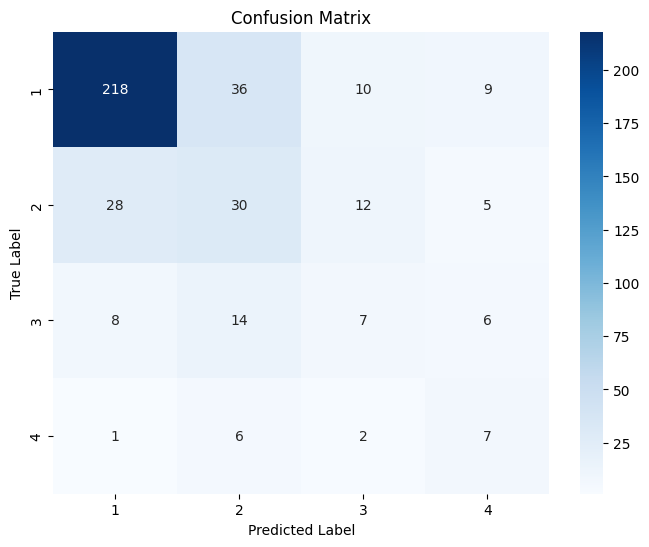

In [23]:
from sklearn.metrics import confusion_matrix

# Building the decision tree for multiclass classification
decision_tree = build_tree(X_train, Y_train_4)

# Predicting on the test set
y_pred = predict(decision_tree, X_test)

# Calculateing confusion matrix
conf_matrix = confusion_matrix(Y_test_4, y_pred)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


$$
\operatorname{Entropy}(Y)=-\sum_{i=1}^C p_i \cdot \log _2\left(p_i\right)
$$
where $C$ is the number of unique classes, and $p_i$ is the probability of class $i$ in the set $Y$.

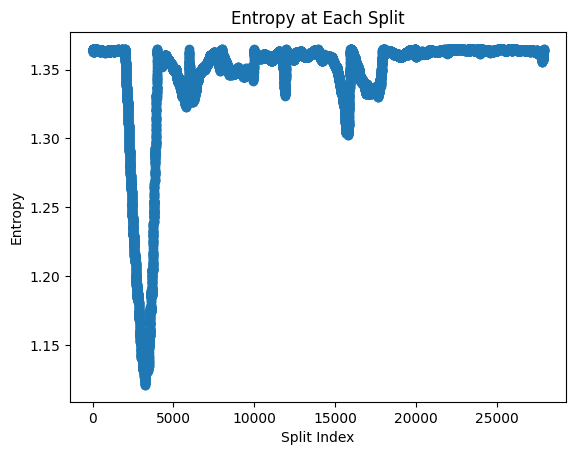

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Finding the best split and get entropies
best_feature_index, best_threshold, entropies = find_best_split(X, y)

# Plotting the entropy graph
plt.plot(entropies, marker='o')
plt.title('Entropy at Each Split')
plt.xlabel('Split Index')
plt.ylabel('Entropy')
plt.show()


#***3. Adaboost***



AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that combines the predictions of multiple weak classifiers to create a strong classifier. In the context of multiclass classification, AdaBoost can be extended using a one-vs-all strategy.

## **_3.1 Implementation of the Model_**

**The algorithm works as follows:**
$$
\textbf{For $t=1$ to $T$ :}\\ $$
- Train a weak classifier $h_t(x)$ using the weighted training dataset $\left(X, Y, w^{(t)}\right)$, where $w^{(t)}$ are the sample weights at iteration $t$.
- Compute the error of the weak classifier:
$$
\epsilon_t=\sum_{i=1}^N w_i^{(t)} \cdot z\left(h_t\left(x_i\right) \neq y_i\right)
$$
where $z(\cdot)$ is the indicator function.
- Compute the classifier weight:
$$
\alpha_t=\frac{1}{2} \cdot \log \left(\frac{1-\epsilon_t}{\epsilon_t}\right)
$$
- Update the weights:
$$
w_i^{(t+1)}=w_i^{(t)} \cdot \exp \left(-\alpha_t \cdot y_i \cdot h_t\left(x_i\right)\right)
$$

$$\\
\textbf{the weights are initialised to: } w_i^{(i)}=1/N. \text{ $\bf{N}$ = number of samples}
$$


---


$$\\
\text{combine the weak classifiers into a strong classifier on the following basis:}\\
H(x) = \text{argmax}_c \sum_{t=1}^{T} \alpha_t \cdot z(h_t(x)=c)
\\
\text{At each iteration, the weights of incorrectly classified samples are increased, focusing on the harder-to-classify examples.}
$$

**One-vs-All Extension:**
In multiclass classification, AdaBoost can be applied using a one-vs-all strategy, where each weak classifier is trained to distinguish one class from the rest.

The final prediction is made by selecting the class with the highest weighted sum of weak classifier predictions.

## **_3.2 Code_**

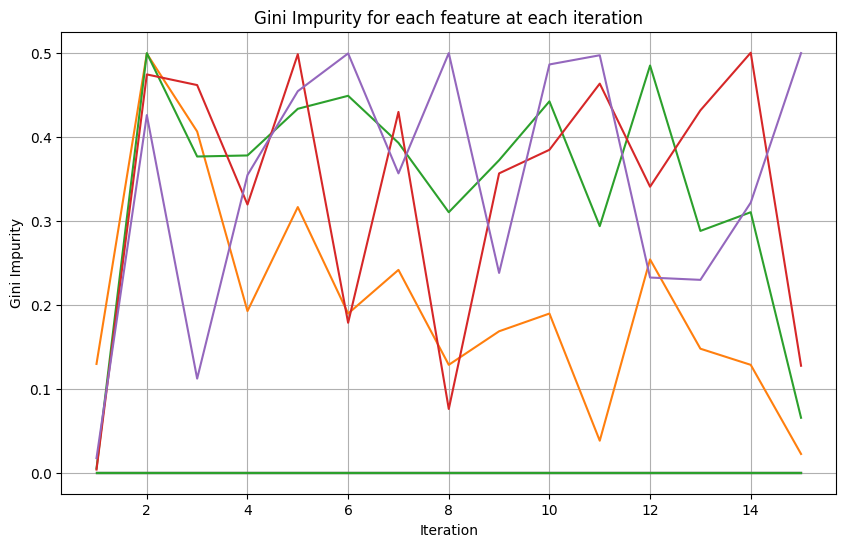

In [28]:
def initialize_weights(num_samples):
    return np.ones(num_samples) / num_samples

def gini_impurity(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

def train_weak_classifier(X, y, weights):
    num_samples, num_features = X.shape
    best_feature = 0
    threshold = 0
    polarity = 1
    min_error = float('inf')

    for feature in range(num_features):
        sorted_indices = np.argsort(X[:, feature])
        sorted_labels = y[sorted_indices]
        sorted_weights = weights[sorted_indices]

        error_positive = 0
        error_negative = np.sum(sorted_weights[sorted_labels == -1])

        for i in range(num_samples):
            if sorted_labels[i] == 1:
                error_positive += sorted_weights[i]
            else:
                error_negative -= sorted_weights[i]

            weighted_error = error_positive + error_negative
            if i < num_samples - 1 and sorted_indices[i] == sorted_indices[i + 1]:
                continue

            if weighted_error < min_error:
                min_error = weighted_error
                best_feature = feature
                threshold = X[sorted_indices[i], feature]
                polarity = 1 if error_positive < error_negative else -1

    return {"feature": best_feature, "threshold": threshold, "polarity": polarity}

def predict(stump, X):
    num_samples, _ = X.shape
    predictions = np.ones(num_samples)
    if stump["polarity"] == 1:
        predictions[X[:, stump["feature"]] < stump["threshold"]] = -1
    else:
        predictions[X[:, stump["feature"]] >= stump["threshold"]] = -1
    return predictions

def compute_classifier_error(y_true, y_pred, weights):
    """Compute the weighted error of the classifier."""
    error = np.sum(weights * (y_pred != y_true))
    return error / np.sum(weights)

def compute_classifier_weight(error):
    return 0.5 * np.log((1 - error) / error)

def update_weights(weights, alpha, y_true, y_pred):
    factor = np.exp(-alpha * y_true * y_pred)
    return weights * factor / np.sum(weights * factor)


def plot_combined_gini_impurity(iterations, gini_values_per_feature,num_features):

    plt.figure(figsize=(10, 6))


    plt.plot(iterations, gini_values_per_feature)

    plt.xlabel('Iteration')
    plt.ylabel('Gini Impurity')
    plt.title('Gini Impurity for each feature at each iteration')
    plt.grid(True)
    plt.show()



def adaboost_with_gini(X, y, weights, num_classifiers):
    num_samples, num_features = X.shape
    classifiers = []
    alphas = []
    gini_values_per_iteration = np.zeros(num_classifiers)

    for iteration in range(num_classifiers):
        stump = train_weak_classifier(X, y, weights)
        y_pred = predict(stump, X)
        error = compute_classifier_error(y, y_pred, weights)
        alpha = compute_classifier_weight(error)
        alphas.append(alpha)

        gini_values_per_iteration[iteration] = gini_impurity(y_pred)

        weights = update_weights(weights, alpha, y, y_pred)
        classifiers.append(stump)


    return classifiers, alphas, gini_values_per_iteration

def adaboost_multiclass(X, y, num_classifiers):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))

    weights = initialize_weights(num_samples)
    classifiers = []
    alphas = []
    gini_values_per_feature = np.zeros((num_classifiers, num_features))

    for class_label in range(1, num_classes + 1):
        binary_labels = np.where(y == class_label, 1, -1)

        class_classifiers, class_alphas, class_gini_values = adaboost_with_gini(X, binary_labels, weights, num_classifiers)
        classifiers.append(class_classifiers)
        alphas.append(class_alphas)

        gini_values_per_feature[:,class_label] += class_gini_values



    return classifiers, alphas, gini_values_per_feature



def predict_multiclass(classifiers, alphas, X, num_classes):
    """Make predictions for multiclass using AdaBoost."""
    num_samples = X.shape[0]
    class_votes = np.zeros((num_samples, num_classes))

    for class_label in range(num_classes):
        for i in range(len(classifiers[class_label])):
            class_votes[:, class_label] += alphas[class_label][i] * predict(classifiers[class_label][i], X)

    predictions = np.argmax(class_votes, axis=1) + 1
    return predictions

num_classifiers = 15
num_classes = Y.unique()
num_features=X_test.shape[1]
gini_values_per_feature = np.zeros((num_classifiers, num_features))

classifiers_multiclass, alphas_multiclass,gini_values_per_feature = adaboost_multiclass(X_train, Y_train_4, num_classifiers)

predictions_multiclass = predict_multiclass(classifiers_multiclass, alphas_multiclass, X_test, num_classes=4)
plot_combined_gini_impurity(range(1, num_classifiers + 1), gini_values_per_feature, num_features)

Here's the Plot for gini values for different features at different iterations

We now obtain the accuracy score for our model:

In [29]:
accuracy = np.mean(predictions_multiclass==Y_test_4)
print(accuracy*100,"%")

71.42857142857143 %


### Cross Validation to optimise hyperparameter

Here the hyperparameter for our model is `num_classifiers`.
To optimise it for our data, we run a k-fold cross validation over the testing data with k=5.

In [30]:
def k_fold_cross_validation(X, y, num_classifiers, num_folds=5):
    num_samples = X.shape[0]
    fold_size = num_samples // num_folds
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    accuracies = []

    for i in range(num_folds):
        # Split the data into training and testing sets
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        # Train AdaBoost using the training set
        classifiers, alphas, _ = adaboost_multiclass(X_train, y_train, num_classifiers)

        # Make predictions on the test set
        predictions = predict_multiclass(classifiers, alphas, X_test, num_classes=len(np.unique(y)))

        # Evaluate accuracy
        accuracy = np.sum(predictions == y_test) / len(y_test)
        accuracies.append(accuracy)

    # Return the average accuracy across folds
    return np.mean(accuracies)

# Define your data (X and y)

# Define a range of num_classifiers to test
num_classifiers_range = [10,20,30,50,70,100]

max_acc=0
# Perform k-fold cross-validation for each num_classifiers value
for num_classifiersCV in num_classifiers_range:
    mean_accuracy = k_fold_cross_validation(X_test, Y_test_4, num_classifiersCV)
    if mean_accuracy>max_acc:
      num_final_classifiers = num_classifiersCV
      max_acc=mean_accuracy



This is our optimised `num_classifiers` hyperparameter

In [31]:
print(f'Cross Validated Num Classifiers: {num_final_classifiers}, Mean Accuracy: {mean_accuracy}')

Cross Validated Num Classifiers: 20, Mean Accuracy: 0.691139240506329


Now we run our model with this optimised hyperparameter.

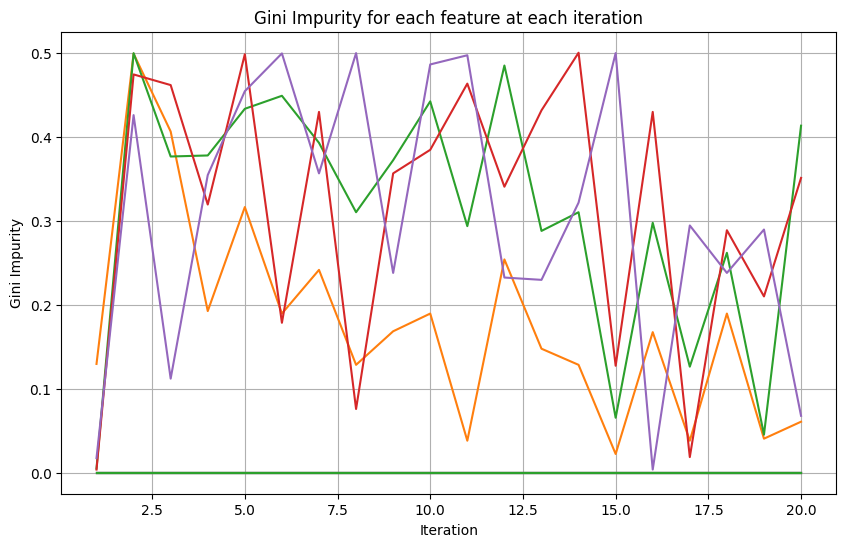

In [32]:
num_classes = len(Y.unique())
gini_values_per_feature = np.zeros((num_final_classifiers, num_features))

classifiers_multiclass, alphas_multiclass,gini_values_per_feature = adaboost_multiclass(X_train, Y_train_4, num_final_classifiers)

predictions_multiclass = predict_multiclass(classifiers_multiclass, alphas_multiclass, X_test, num_classes=4)
plot_combined_gini_impurity(range(1, num_final_classifiers + 1), gini_values_per_feature, num_features)

And obtain the following accuracy:

In [33]:
accuracy = np.mean(predictions_multiclass==Y_test_4)
print(accuracy*100,"%")

71.17794486215539 %


## **_3.3 Insights drawn (plots, markdown explanations)_**

The accuracy measure of our model with appropriate parameter is:


In [34]:
accuracyada = np.mean(predictions_multiclass==Y_test_4)
print(accuracyada*100,"%")

71.17794486215539 %


Here's the confusion matrix:

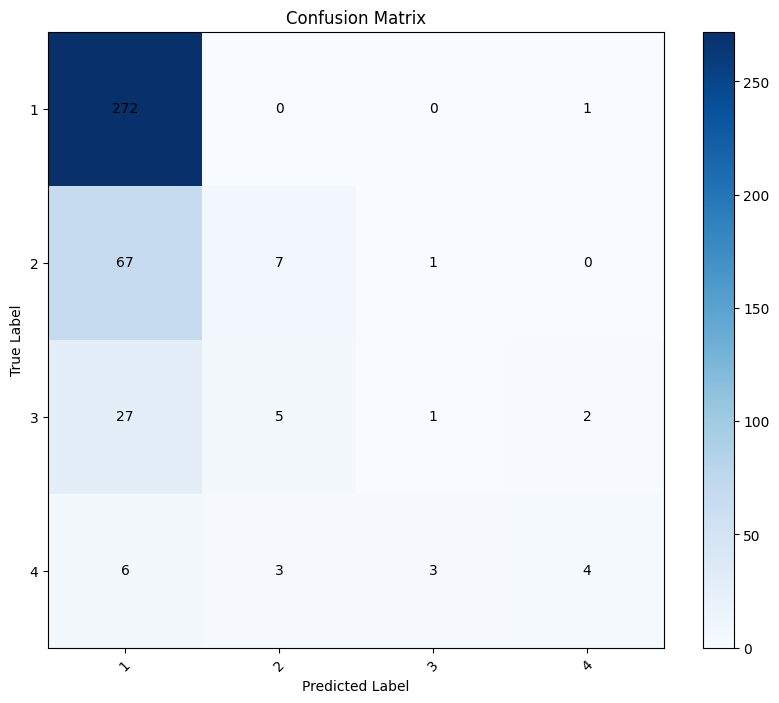

In [35]:
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        matrix[true-1][pred-1] += 1  # Assuming class labels start from 1

    return matrix

def plot_confusion_matrix(matrix,class_labels):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')
    plt.show()

num_classes = 4
class_labels = [1,2,3,4]
conf_matrix = confusion_matrix(Y_test_4, predictions_multiclass, num_classes)
plot_confusion_matrix(conf_matrix,class_labels)

**Insights on the crime rate:** \\ As is expected, the crime rate per population should fall into a lowerfrequency bracket, that is majority into first few brackets, and our predicted values do convey the same.

# **_4. Multiclass SVM_**



## **_4.1 Implementation of the Model_**

SVM is generally a binary classifier, so in order to implement a multiclass SVM we use One Vs Rest Algorithm.

One-vs-Rest strategy involves training a separate binary classifier for each class, treating one class as the positive class, and grouping the rest as the negative class. This results in a set of binary classifiers, one for each class.


**Binary SVM Class (SVM)**

**1. Initialization**:


*  Learning Rate : $\alpha$
*  Regularization Parameter : $\lambda$
*  Number of Iterations : $epoches$
*  Weight Vector : $w$
*  Bias Term : $b$

**2. Objective Function:**
$$
\cdot \operatorname{minimize}\left(\frac{1}{2}\|\mathbf{w}\|^2+\lambda \sum_{i=1}^N \max \left(0,1-y_i\left(\mathbf{w} \cdot \mathbf{x}_i-b\right)\right)\right)
$$

**3. Gradient Descent Updates:**
- For each sample $\mathbf{x}_i$ :
- If $y_i\left(\mathbf{w} \cdot \mathbf{x}_i-b\right) \geq 1$ :
  - $\mathbf{w} \leftarrow \mathbf{w}-\operatorname{\alpha} \cdot(2 \lambda \cdot \mathbf{w})$

 Else:
  - $\mathbf{w} \leftarrow \mathbf{w}-\operatorname{\alpha} \cdot\left(2 \lambda \cdot \mathbf{w}-\mathbf{x}_i \cdot y_i\right)$
  - $b \leftarrow b-\operatorname{\alpha} \cdot y_i$


**4. Decision Function:**
- decision_function $(\mathbf{X})=\mathbf{X} \cdot \mathbf{w}-b$


---



**One-vs-All / One-vs-Rest SVM Class ( MultiClassSVM ')**

**1. Initialization:**
- Learning Rate: $\alpha$
- Regularization Parameter: $\lambda$
- Number of Iterations: $epoches$
- List of Models: models

**2. Fitting:**
- For each unique class cls:
- Convert multiclass labels to binary labels $( \pm 1)$.
- Train a binary SVM model with the binary labels.

**3. Prediction:**
- For each binary SVM model:
- Calculate the decision function output.
- Choose the class with the maximum decision function output as the final prediction.

## **_4.2 Code_**

In [36]:
class MultiClassSVM:

    def __init__(self, learning_rate=0.001, lambda_=0.01, epoches=1000):
        self.lr = learning_rate
        self.lambda_ = lambda_
        self.epoches = epoches
        self.models = []  # List to store binary SVM models for each class

    def fit(self, X, y):
        unique_classes = np.unique(y)

        for cls in unique_classes:
            binary_labels = np.where(y == cls, 1, -1)
            svm_model = SVM(learning_rate=self.lr, lambda_=self.lambda_, epoches=self.epoches)
            svm_model.fit(X, binary_labels)
            self.models.append((cls, svm_model))

    def predict(self, X):
        # For each binary SVM model, calculate the decision function output
        decision_outputs = [model[1].decision_function(X) for model in self.models]

        # Convert decision outputs to class predictions
        predictions = np.argmax(decision_outputs, axis=0) + 1
        return predictions

class SVM:

    def __init__(self, learning_rate=0.001, lambda_=0.01, epoches=1000):
        self.lr = learning_rate
        self.lambda_ = lambda_
        self.epoches = epoches
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epoches):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_ * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_ * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def decision_function(self, X):
        return np.dot(X, self.w) - self.b

## **_4.3 Insights drawn (plots, markdown explanations)_**

Output class divided into 15 classes
Accuracy on Test Set : 29.82%
Accuracy on Train Set: 31.79%


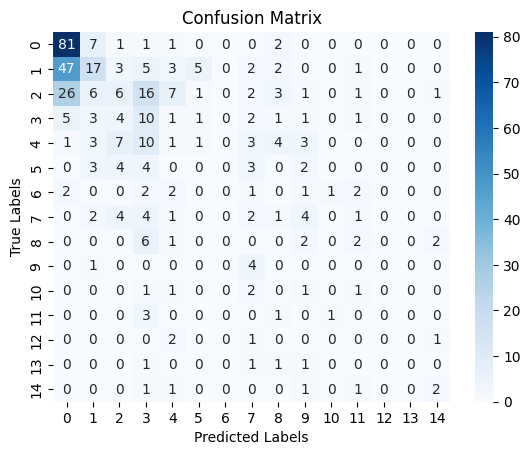

In [37]:
from sklearn.metrics import confusion_matrix

my_model_1 = MultiClassSVM(learning_rate=0.001, lambda_=0.01, epoches=1000)
my_model_1.fit(X_train, Y_train_15)
print("Output class divided into 15 classes")
predictions_ovr_test_1= my_model_1.predict(X_test)
accuracy_test = np.mean(predictions_ovr_test_1 == Y_test_15)
print(f"Accuracy on Test Set : {accuracy_test * 100:.2f}%")

predictions_ovr_train_1 = my_model_1.predict(X_train)
accuracy_train = np.mean(predictions_ovr_train_1 == Y_train_15)
print(f"Accuracy on Train Set: {accuracy_train * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(Y_test_15, predictions_ovr_test_1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Output class divided into 7 classes
Accuracy on Test Set : 52.88%
Accuracy on Train Set: 56.24%


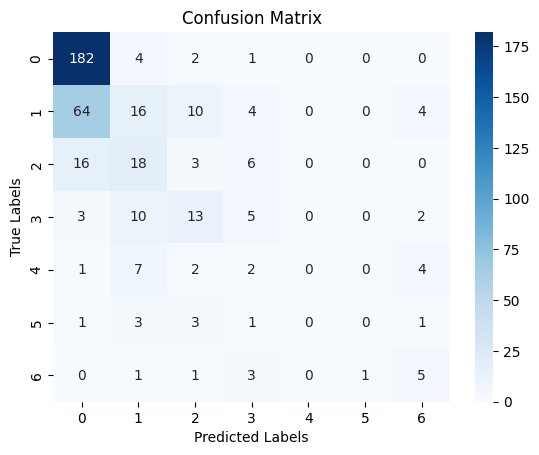

In [38]:
my_model_2 = MultiClassSVM(learning_rate=0.001, lambda_=0.01, epoches=1000)
my_model_2.fit(X_train, Y_train_7)
print("Output class divided into 7 classes")
predictions_ovr_test_2= my_model_2.predict(X_test)
accuracy_test = np.mean(predictions_ovr_test_2 == Y_test_7)
print(f"Accuracy on Test Set : {accuracy_test * 100:.2f}%")

predictions_ovr_train_2 = my_model_2.predict(X_train)
accuracy_train = np.mean(predictions_ovr_train_2 == Y_train_7)
print(f"Accuracy on Train Set: {accuracy_train * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(Y_test_7, predictions_ovr_test_2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Output class divided into 4 classes
Accuracy on Test Set : 72.18%
Accuracy on Train Set: 73.35%


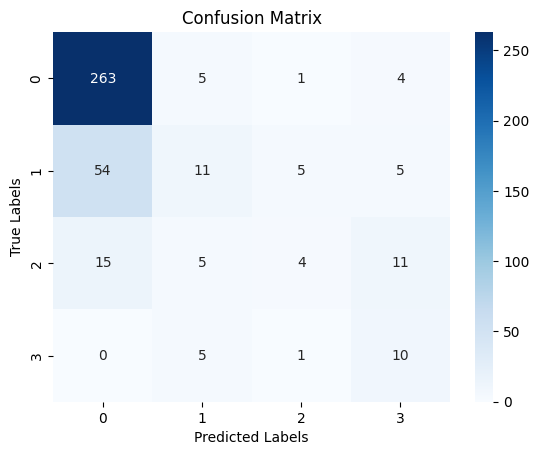

In [39]:
my_model_3 = MultiClassSVM(learning_rate=0.001, lambda_=0.01, epoches=1000)
my_model_3.fit(X_train, Y_train_4)
print("Output class divided into 4 classes")
predictions_ovr_test_3= my_model_3.predict(X_test)
accuracy_test = np.mean(predictions_ovr_test_3 == Y_test_4)
print(f"Accuracy on Test Set : {accuracy_test * 100:.2f}%")

predictions_ovr_train_3 = my_model_3.predict(X_train)
accuracy_train = np.mean(predictions_ovr_train_3 == Y_train_4)
print(f"Accuracy on Train Set: {accuracy_train * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(Y_test_4, predictions_ovr_test_3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

We observe that if the Output feature is divided into less number of classes we are able to see more accuracy.

* 15 classes -> Accuracy : 29.82%

* 7 classes  -> Accuracy : 52.88%

* 4 classes  -> Accuracy : 72.18%





In [40]:
print(f"The Accurracy of Descion Tree Classifier is:{k_fold_accuracy * 100:.2f}%")
print(f"The Accurracy of AdaBoost Classifier is:  {accuracyada*100}%")
print(f"The Accurracy of MutiCLass SVM Classifier is:{accuracy_test * 100:.2f}%")

The Accurracy of Descion Tree Classifier is:67.11%
The Accurracy of AdaBoost Classifier is:  71.17794486215539%
The Accurracy of MutiCLass SVM Classifier is:72.18%


The Best Model according to accuracy is:


In [41]:
if k_fold_accuracy>accuracyada :
  if k_fold_accuracy>accuracy_test :
    print(f"The best model is Decision Tree Classification")
  else:
    print(f"The best model is MultiClass SVM Clasifier")
elif accuracyada>accuracy_test:
  print(f"The best model is AdaBoost Classifier")
else:
  print(f"The best model is MultiClass SVM Classifier")

The best model is MultiClass SVM Classifier


# **_5. References_**




**Decision Tree with Entropy**

- Class Notes

- [Victor Lavrenko](https://www.youtube.com/playlist?list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO)

- [towardsdatascience](https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5 )

- [Stat Quest](https://www.youtube.com/playlist?list=PLBq2sVJiEBvA9rPo3IEQsJNI4IJbn81tB)



**MultiClass SVM**


- Class Notes

- [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/)

- [HK Lam](https://www.youtube.com/playlist?list=PLJEWP9Z0q94CSaOhMPc8fenUs6wOrSVqY)

- [Stat Quest](https://www.youtube.com/playlist?list=PLBq2sVJiEBvA9rPo3IEQsJNI4IJbn81tB)

**AdaBoost**

- Class Notes

- [Towards Data Science](https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464#:~:text=At%20a%20high%20level%2C%20AdaBoost,1%20(i.e.%202%20leaves))

- [Victor Lavrenko](https://www.youtube.com/playlist?list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO)

- [Stat Quest](https://www.youtube.com/playlist?list=PLBq2sVJiEBvA9rPo3IEQsJNI4IJbn81tB)